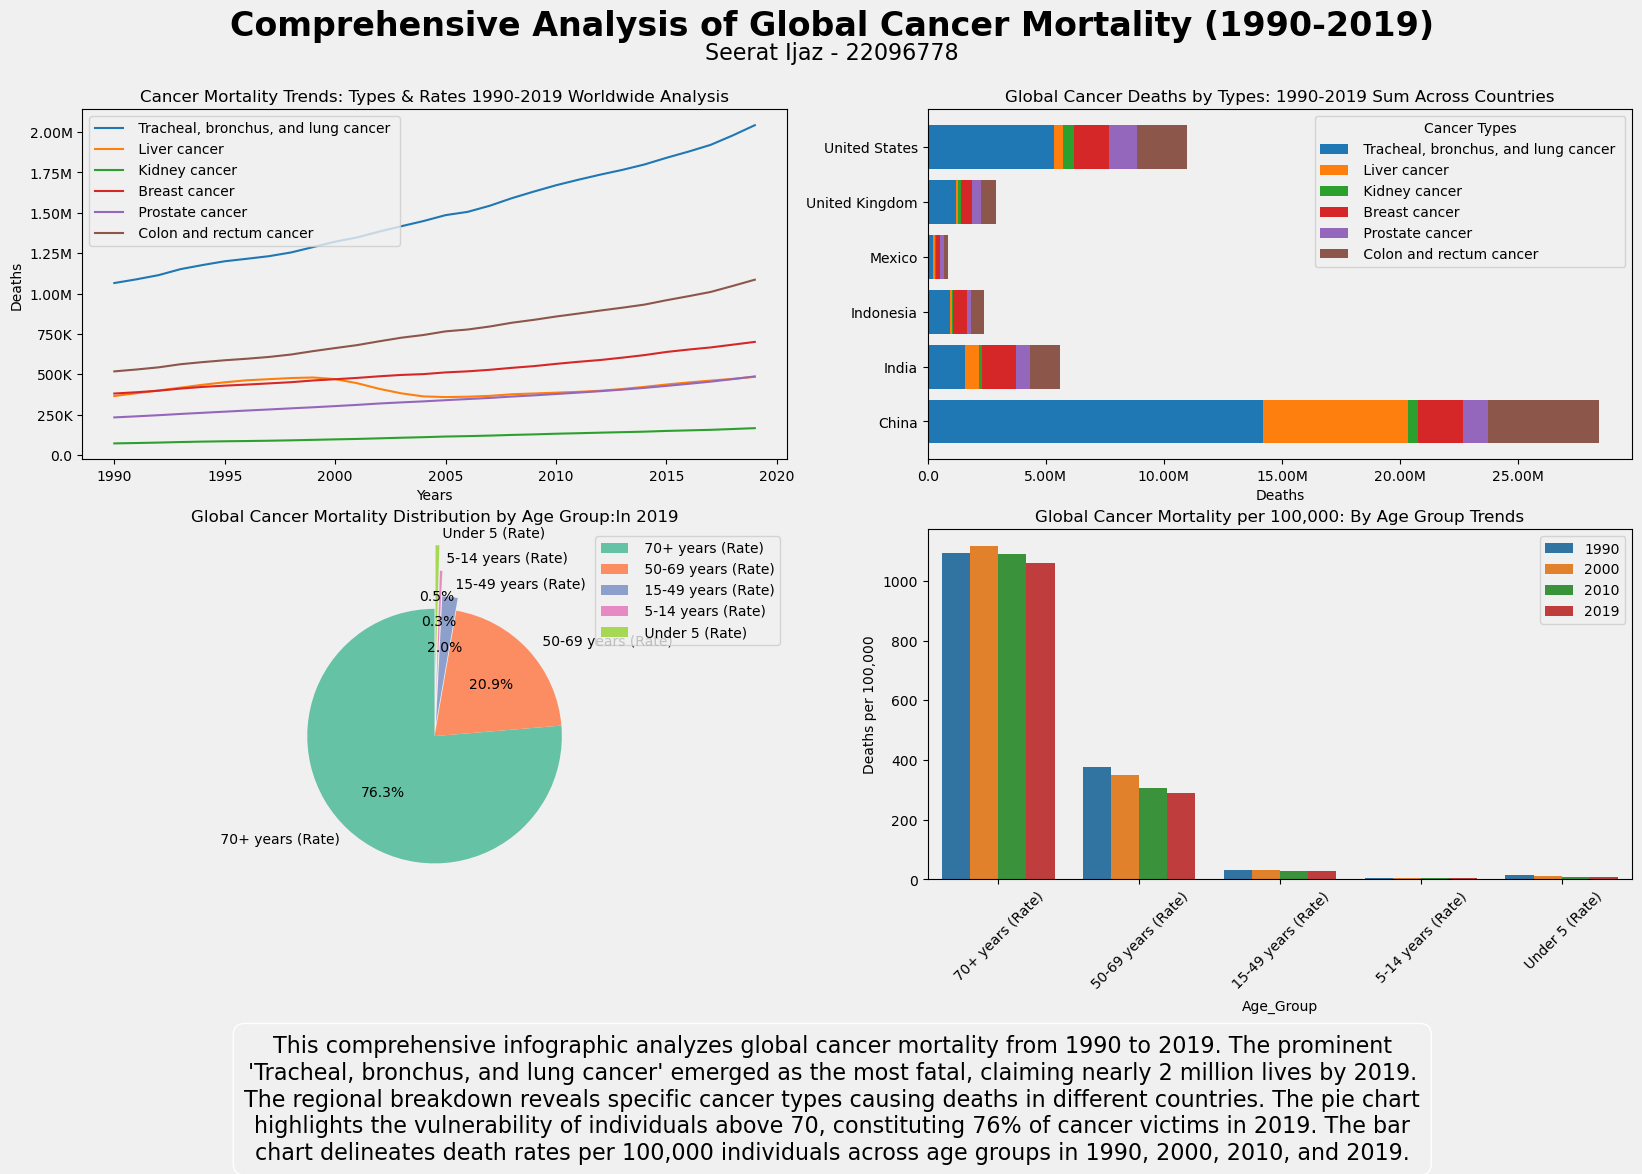

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


def format_ticks(value, _):
    """
    Function to Formate the X-ticks and Y-ticks
    Parameters
    ----------
    value : integer
        Value to convert into K or M.
    _ : TYPE
        DESCRIPTION.

    Returns
    -------
    TYPE
        Returnng the String back.

    """
    if value >= 1e6:
        return f'{value / 1e6:.2f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return str(value)


# Reading the Data files
total_cancer_death_by_type = pd.read_csv('total-cancer-deaths-by-type.csv')
total_cancer_death_by_age = pd.read_csv('cancer-death-rates-by-age.csv')

years = total_cancer_death_by_type['Year']
entity = total_cancer_death_by_type['Entity']
# Droping the Entity, Code, Year, Column
total_cancer_death_by_type = total_cancer_death_by_type.drop(
    ['Entity', 'Code', 'Year'], axis=1)
cols = total_cancer_death_by_type.columns
type_name = []
# Renaming the Columns of Dataframe
for names in cols:
    type_name.append(names.split('-')[1])
total_cancer_death_by_type = total_cancer_death_by_type.rename(
    columns=dict(zip(total_cancer_death_by_type.columns, type_name)))
cancer_types = [
    ' Tracheal, bronchus, and lung cancer ',
    ' Liver cancer ',
    ' Kidney cancer ',
    ' Breast cancer ',
    ' Prostate cancer ',
    ' Colon and rectum cancer ']
# getting only the Required columns
total_cancer_death_by_type = total_cancer_death_by_type[cancer_types]
total_cancer_death_by_type['Year'] = years
total_cancer_death_by_type['entity'] = entity
# Filtering the Data Based on entity World.
total_cancer_death_by_type_world = total_cancer_death_by_type[
    total_cancer_death_by_type['entity'] == 'World']
# Defining the Subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
# Ploting the Line Graph
for i in cancer_types:
    sns.lineplot(x=total_cancer_death_by_type_world['Year'],
                 y=total_cancer_death_by_type_world[i], label=i, ax=axs[0, 0])
# Setting Labels legends and their face color.
axs[0, 0].set_ylabel('Deaths')
axs[0, 0].set_xlabel('Years')
axs[0, 0].set_facecolor('#f0f0f0')
axs[0, 0].legend(facecolor='#f0f0f0')
axs[0, 0].set_title(
    'Cancer Mortality Trends: Types & Rates 1990-2019 Worldwide Analysis')
axs[0, 0].yaxis.set_major_formatter(FuncFormatter(format_ticks))
# Defining the Countries For Getting the Data of deaths there
countries = [
    'India',
    'Indonesia',
    'China',
    'United States',
    'United Kingdom',
    'Mexico']
# Getting the Sum of Deaths from 1990 to 2019
countries_with_most_deaths = total_cancer_death_by_type.groupby('entity').sum()
countries_with_most_deaths = countries_with_most_deaths.reset_index()
countries_with_most_deaths = countries_with_most_deaths[
    countries_with_most_deaths
    ['entity'].isin(
        countries)]
countries_with_most_deaths = countries_with_most_deaths.drop('Year', axis=1)
# Ploting the Stack Bar Plot.
for i, col in enumerate(countries_with_most_deaths.columns[1:]):
    axs[0,
        1].barh(countries_with_most_deaths['entity'],
                countries_with_most_deaths[col],
                label=col,
                left=countries_with_most_deaths.iloc[:,
                                                     1:i + 1].sum(axis=1))
axs[0, 1].legend(title='Cancer Types', facecolor='#f0f0f0')
axs[0, 1].set_xlabel('Deaths')
axs[0, 1].set_facecolor('#f0f0f0')
axs[0, 1].set_title(
    'Global Cancer Deaths by Types: 1990-2019 Sum Across Countries')
axs[0, 1].xaxis.set_major_formatter(FuncFormatter(format_ticks))

# Looking for different age groups affected by cancer.
years = total_cancer_death_by_age['Year']
entity = total_cancer_death_by_age['Entity']
total_cancer_death_by_age = total_cancer_death_by_age.drop(
    ['Entity', 'Code', 'Year'], axis=1)
cols = total_cancer_death_by_age.columns
type_name = []
# Renaming the columns names
for names in cols:
    type_name.append(names.split(':')[-1])
total_cancer_death_by_age = total_cancer_death_by_age.rename(
    columns=dict(zip(total_cancer_death_by_age.columns, type_name)))
total_cancer_death_by_age = total_cancer_death_by_age.drop(
    [' Age-standardized (Rate)', ' All Ages (Rate)'], axis=1)
total_cancer_death_by_age['Year'] = years
total_cancer_death_by_age['entity'] = entity
# Getting the People died by age group in 2019.
total_cancer_death_by_age_world_2019 = total_cancer_death_by_age[(
    total_cancer_death_by_age['Year'] == 2019) & (
        total_cancer_death_by_age['entity'] == 'World')]
total_cancer_death_by_age_world_2019.head()
label = total_cancer_death_by_age_world_2019.columns
values = list(total_cancer_death_by_age_world_2019.iloc[0])[:-2]
explode = (0, 0, 0.1, 0.3, 0.5)
axs[1, 0].pie(values, labels=label[:-2], autopct='%1.1f%%',
              startangle=90, colors=sns.color_palette('Set2'), explode=explode)
# Add a circle in the center to make it look like a donut chart (optional)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axs[1, 0].set_facecolor('#f0f0f0')
axs[1, 0].legend(facecolor='#f0f0f0')
fig.gca().add_artist(centre_circle)

# Set aspect ratio to be equal to ensure a circular pie chart
axs[1, 0].axis('equal')

# Add a title
axs[1, 0].set_title(
    'Global Cancer Mortality Distribution by Age Group:In 2019')
# getting the data for the Bar plot.
total_cancer_death_by_age_world_2019 = total_cancer_death_by_age[
    (total_cancer_death_by_age['Year'].isin(
        [1990, 2000, 2010, 2019])) & (total_cancer_death_by_age
                                      ['entity'] == 'World')]
total_cancer_death_by_age_world_d = total_cancer_death_by_age_world_2019.drop(
    'entity', axis=1)
data = pd.melt(total_cancer_death_by_age_world_d, id_vars=[
               'Year'], var_name='Age_Group', value_name='Value')
# Bar Plot of Age group by Years
sns.barplot(x='Age_Group', y='Value', hue='Year', data=data, ax=axs[1, 1])
plt.xticks(rotation=45)
axs[1, 1].set_title('Global Cancer Mortality per 100,000: By Age Group Trends')
axs[1, 1].set_facecolor('#f0f0f0')
axs[1, 1].legend(facecolor='#f0f0f0')
axs[1, 1].set_ylabel('Deaths per 100,000')
fig.patch.set_facecolor('#f0f0f0')
# Adding the Title to Infographic
plt.suptitle(
    'Comprehensive Analysis of Global Cancer Mortality (1990-2019)',
    fontsize=24,
    weight='bold')
plt.gcf().text(0.5, 0.93, 'Seerat Ijaz - 22096778', ha='center', fontsize=16)
# adding the Text to the Graphics
description_text = (
    "This comprehensive infographic analyzes global cancer mortality "
    "from 1990 to 2019. The prominent\n"
    "'Tracheal, bronchus, and lung cancer' emerged as the most fatal, "
    "claiming nearly 2 million lives by 2019.\n"
    "The regional breakdown reveals specific cancer types "
    "causing deaths in different countries. The pie chart\n"
    "highlights the vulnerability of individuals above 70, "
    "constituting 76% of cancer victims in 2019. The bar\n"
    "chart delineates death rates per 100,000 individuals "
    "across age groups in 1990, 2000, 2010, and 2019.")

fig.text(0.5, -0.11, description_text, ha="center", va="center", fontsize=16,
         bbox=dict(facecolor='#f0f0f0', edgecolor='white',
                   boxstyle='round,pad=0.5'))
# Saving the Picture of the graphics
#plt.savefig('22096778.png', bbox_inches='tight', pad_inches=0.5, dpi=300)
plt.show()
